In [ ]:
!pip install azure-cognitiveservices-vision-computervision

In [ ]:
!pip install pillow

In [ ]:
!pip install azure-ai-vision-imageanalysis

In [ ]:
# Download the ZIP file containing only the images folder
!wget -O /content/images.zip https://github.com/lauradiosan/AI-UBB/archive/refs/heads/main.zip

# Unzip the images folder directly into /content
!unzip -q /content/images.zip -d /content/images

# Move the contents of the images folder to /content
!mv /content/images/AI-UBB-main/2023-2024/labs/lab04/images/* /content/images

# Remove the now empty extracted directory
!rm -r /content/images/AI-UBB-main

# Remove the downloaded ZIP file
!rm /content/images.zip

# List files in the /content directory
!ls /content/images

--2024-03-29 10:42:58--  https://github.com/lauradiosan/AI-UBB/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/lauradiosan/AI-UBB/zip/refs/heads/main [following]
--2024-03-29 10:42:58--  https://codeload.github.com/lauradiosan/AI-UBB/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/images.zip’

/content/images.zip     [        <=>         ] 102.22M  19.0MB/s    in 5.4s    

2024-03-29 10:43:04 (18.9 MB/s) - ‘/content/images.zip’ saved [107191002]

mv: cannot move '/content/images/AI-UBB-main/2023-2024/labs/lab04/images/bikes' to '/content/images/bikes': Directory not empty

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from azure.ai.vision.imageanalysis.models import VisualFeatures

from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from io import BytesIO
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
%env VISION_KEY=dc87d8aa49094e3ca8a2b68f5fc06b8e

env: VISION_KEY=dc87d8aa49094e3ca8a2b68f5fc06b8e


In [ ]:
%env VISION_ENDPOINT=https://raulfrandes.cognitiveservices.azure.com/

env: VISION_ENDPOINT=https://raulfrandes.cognitiveservices.azure.com/


In [ ]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

1. Sa se foloseasca un algoritm de clasificare a imaginilor (etapa de inferenta/testare) si sa se stabileasca performanta acestui algoritm de clasificare binara (imagini cu biciclete vs. imagini fara biciclete).

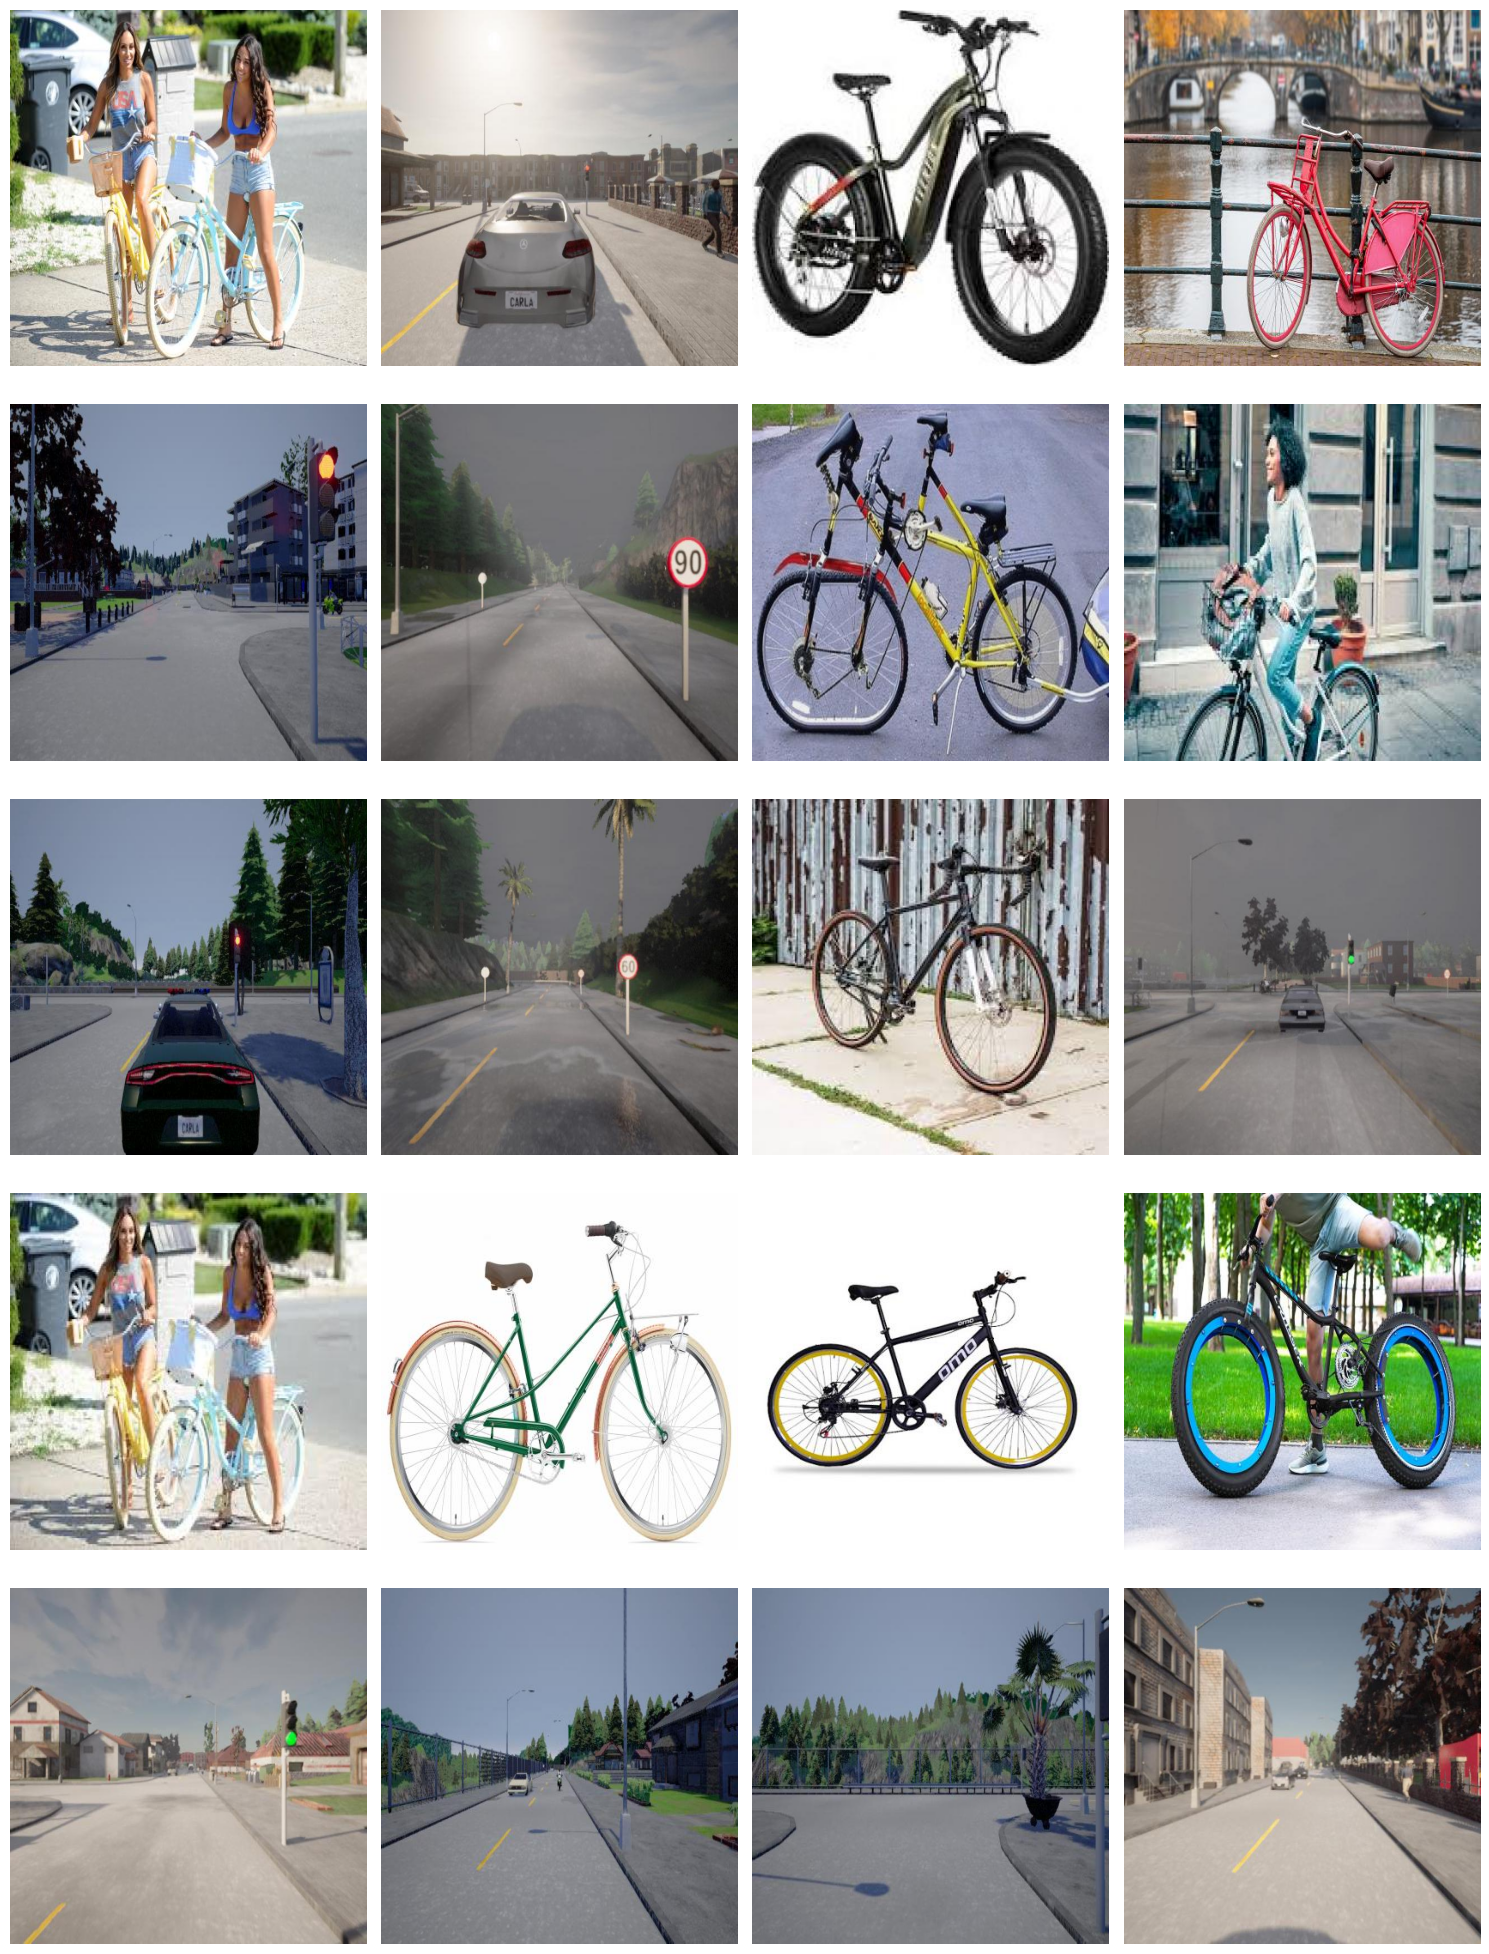

In [ ]:
images = {}
for filename in os.listdir('/content/images/bikes'):
  image_path = os.path.join('/content/images/bikes', filename)
  with open(image_path, 'rb') as image_file:
    image_data = image_file.read()
    images[image_path] = image_data

fig, axs = plt.subplots(5, 4, figsize=(15, 20))

axs = axs.ravel()

idx = 0
for key in images:
  img = Image.open(BytesIO(images[key]))
  img = img.convert('RGB')
  axs[idx].imshow(img)
  axs[idx].axis('off')
  idx += 1

plt.tight_layout()
plt.show()

In [ ]:
ground_truth = {
    '/content/images/bikes/bike03.jpg': True,
    '/content/images/bikes/traffic01.jpg': False,
    '/content/images/bikes/bike04.jpg': True,
    '/content/images/bikes/bike10.jpg': True,
    '/content/images/bikes/traffic05.jpg': False,
    '/content/images/bikes/traffic07.jpg': False,
    '/content/images/bikes/bike09.jpg': True,
    '/content/images/bikes/bike07.jpg': True,
    '/content/images/bikes/traffic10.jpg': False,
    '/content/images/bikes/traffic02.jpg': False,
    '/content/images/bikes/bike05.jpg': True,
    '/content/images/bikes/traffic06.jpg': False,
    '/content/images/bikes/bike06.jpg': True,
    '/content/images/bikes/bike1.jpg': True,
    '/content/images/bikes/bike02.jpg': True,
    '/content/images/bikes/bike08.jpg': True,
    '/content/images/bikes/traffic03.jpg': False,
    '/content/images/bikes/traffic08.jpg': False,
    '/content/images/bikes/traffic09.jpg': False,
    '/content/images/bikes/traffic04.jpg': False
}

pred_images = {}
for key in images:
  image_stream = BytesIO(images[key])
  result = computervision_client.analyze_image_in_stream(image_stream, visual_features=[VisualFeatureTypes.tags])
  pred_images[key] = False
  for tag in result.tags:
    if tag.name in ["bicycle", "bike", "bikes"]:
      pred_images[key] = True

ground_truth_list = list(ground_truth.values())
pred_images_list = list(pred_images.values())

acc = accuracy_score(ground_truth_list, pred_images_list)
precision = precision_score(ground_truth_list, pred_images_list, average=None, labels=[True, False])
recall = recall_score(ground_truth_list, pred_images_list, average = None, labels=[True, False])

print("Accuracy: ", acc, " | Precision: ", precision, " | Recall: ", recall)

Accuracy:  1.0  | Precision:  [1. 1.]  | Recall:  [1. 1.]


2. Pentru imaginile care contin biciclete:
 - a. sa se localizeze automat bicicletele in aceste imagini si sa se evidentieze chenarele care incadreaza bicicletele
 - b. sa se eticheteze (fara ajutorul algoritmilor de AI) aceste imagini cu chenare care sa incadreze cat mai exact bicicletele. Care task dureaza mai mult (cel de la punctul a sau cel de la punctul b)?
 - c. sa se determine performanta algoritmului de la punctul a avand in vedere etichetarile realizate la punctul b (se vor folosi cel putin 2 metrici).

The IoU:  0.9253501359599455
The error: 112.34375



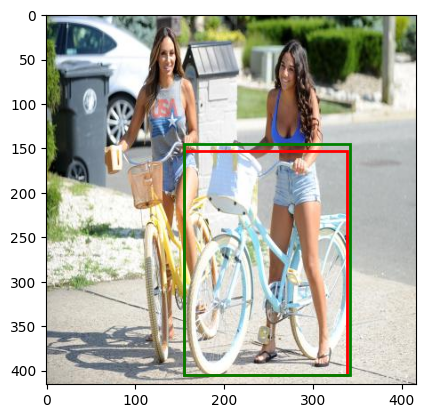

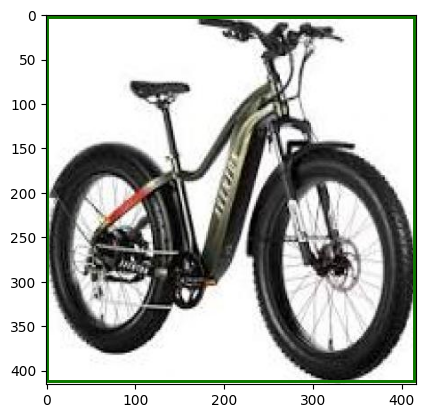

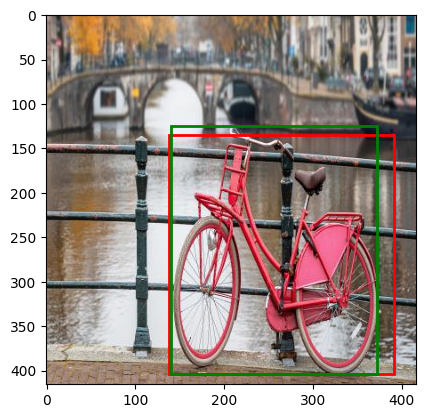

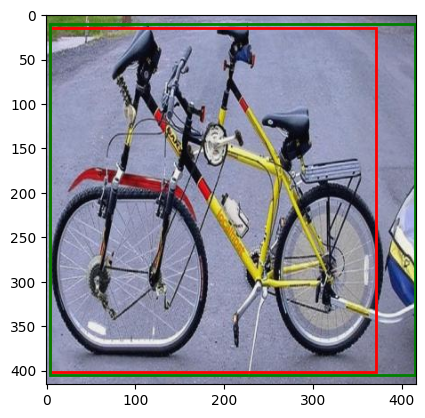

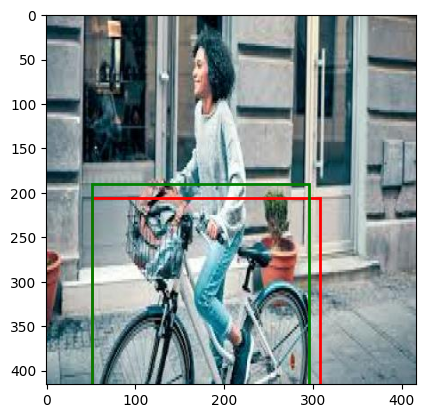

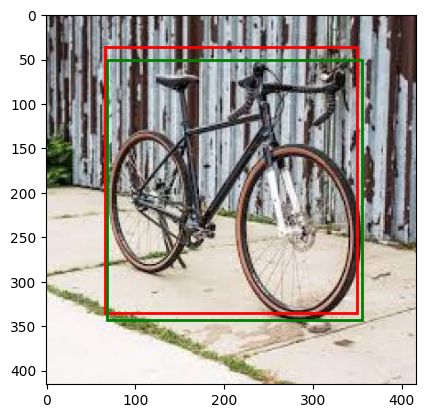

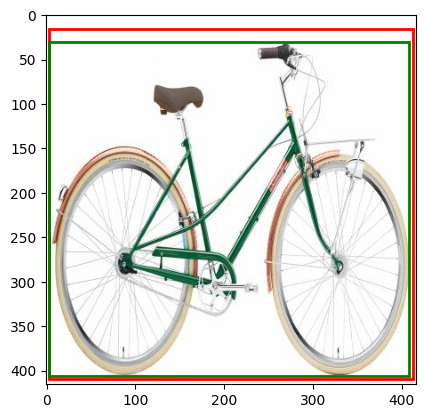

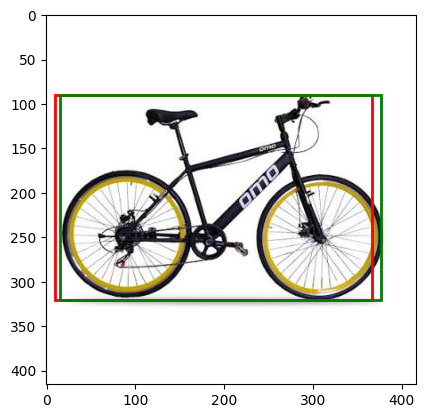

In [ ]:
def mean_avg(box_a, box_b):
  err = 0
  for v in zip(box_b, box_a):
    err = err + (v[0] - v[1])**2
  err /= 4
  return err

def calculate_iou(box_a, box_b):
  x_left = max(box_a[0], box_b[0])
  y_top = max(box_a[1], box_b[1])
  x_right = min(box_a[2], box_b[2])
  y_bottom = min(box_a[3], box_b[3])

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection_area = (x_right - x_left) * (y_bottom - y_top)

  box_a_area = (box_a[2] - box_a[0]) * (box_a[3] - box_a[1])
  box_b_area = (box_b[2] - box_b[0]) * (box_b[3] - box_b[1])

  union_area = box_a_area + box_b_area - intersection_area

  return intersection_area / union_area

ground_truth_bb = {
    '/content/images/bikes/bike03.jpg': [155.0, 145.0, 342.0, 405.0],
    '/content/images/bikes/bike04.jpg': [0.0, 2.0, 414.0, 412.0],
    '/content/images/bikes/bike10.jpg': [140.0, 125.0, 372.0, 404.0],
    '/content/images/bikes/bike09.jpg': [4.0, 10.0, 415.0, 405.0],
    '/content/images/bikes/bike07.jpg': [51.0, 190.0, 295.0, 416.0],
    '/content/images/bikes/bike05.jpg': [68.0, 50.0, 355.0, 343.0],
    '/content/images/bikes/bike1.jpg': [3.0, 30.0, 408.0, 406.0],
    '/content/images/bikes/bike02.jpg': [15.0, 90.0, 376.0, 321.0]
}

pred_images_bb = {}
for key in images:
  image_stream = BytesIO(images[key])
  result = computervision_client.analyze_image_in_stream(image_stream, visual_features=[VisualFeatureTypes.objects])
  for ob in result.objects:
    if ob.object_property in ["bicycle", 'bike', "bikes"]:
      pred_images_bb[key] = [ob.rectangle.x, ob.rectangle.y, ob.rectangle.x + ob.rectangle.w, ob.rectangle.y + ob.rectangle.h]

ious = {}
means = {}
for key in pred_images_bb:
  ious[key] = calculate_iou(list(ground_truth_bb[key]), list(pred_images_bb[key]))
  means[key] = mean_avg(list(ground_truth_bb[key]), list(pred_images_bb[key]))

iou = sum(ious.values()) / len(ious)
mean = sum(means.values()) / len(means)
print("The IoU: ", iou)
print("The error:", mean)

print()

for key in pred_images_bb:
  im = plt.imread(key)
  fig = plt.imshow(im)
  img_bb = pred_images_bb[key]
  real_img_bb = ground_truth_bb[key]
  fig.axes.add_patch(plt.Rectangle(xy=(img_bb[0], img_bb[1]), width=img_bb[2]-img_bb[0], height=img_bb[3]-img_bb[1], fill=False, color='red', linewidth=2))
  fig.axes.add_patch(plt.Rectangle(xy=(real_img_bb[0], real_img_bb[1]), width=real_img_bb[2]-real_img_bb[0], height=real_img_bb[3]-real_img_bb[1], fill=False, color='green', linewidth=2))

  plt.show()